# lesson4 Python主要ライブラリの紹介 part1 -pandas入門-

## 4-0.事前準備

In [ ]:
%%bash
cp ../data/Tokyo_20200101_20221231.csv ./

読み込むcsvファイルを確認してみましょう。

[Tokyo_20200101_20221231.csv](../data/Tokyo_20200101_20221231.csv)

データは気象庁のサイトからダウンロードした2020年1月1日~2022年12月31日までの
東京の気象データを加工したものになっています。

https://www.data.jma.go.jp/gmd/risk/obsdl/index.php

各列の名称とその説明は以下の通りです。

|列名|説明|
|--|--|
|date|年月日|
|mean_temparture|平均気温(℃)|
|max_temparture|最高気温(℃)|
|min_temparture|最低気温(℃)|
|mean_wind_speed|平均風速(m/s)|
|max_wind_speed|最大風速(m/s)|
|max_moment_wind_speed|最大瞬間風速(m/s)|
|most_wind_direction|最多風向(16方位)|
|mean_cloud_cover|平均雲量|
|total_precipitation|合計降水量|
|mean_humidity|平均相対湿度|

## 4-1. pandasとは

pandas はデータ操作によく用いられるライブラリで、CSV などの一般的なデータ形式で保存されたデータの読み込みや、<br>
条件を指定しての一部データの抽出など、機械学習等に活用するデータを整理する際に利用されます。<br>
pandasのみに焦点を絞った参考書もあり、大変人気が高いライブラリの一つです。

- [pandas データ前処理入門](https://www.amazon.co.jp/%E7%8F%BE%E5%A0%B4%E3%81%A7%E4%BD%BF%E3%81%88%E3%82%8B%EF%BC%81pandas%E3%83%87%E3%83%BC%E3%82%BF%E5%89%8D%E5%87%A6%E7%90%86%E5%85%A5%E9%96%80-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%BB%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%82%B9%E3%81%A7%E5%BD%B9%E7%AB%8B%E3%81%A4%E5%89%8D%E5%87%A6%E7%90%86%E6%89%8B%E6%B3%95-%E6%A0%AA%E5%BC%8F%E4%BC%9A%E7%A4%BE%E3%83%AD%E3%83%B3%E3%83%90%E3%83%BC%E3%83%88-ebook/dp/B084MD5DGG?__mk_ja_JP=%E3%82%AB%E3%82%BF%E3%82%AB%E3%83%8A&crid=12MK2NNVZWS6C&keywords=%E7%8F%BE%E5%A0%B4%E3%81%A7%E4%BD%BF%E3%81%88%E3%82%8B%EF%BC%81pandas%E3%83%87%E3%83%BC%E3%82%BF%E5%89%8D%E5%87%A6%E7%90%86%E5%85%A5%E9%96%80+%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%BB%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%82%B9%E3%81%A7%E5%BD%B9%E7%AB%8B%E3%81%A4%E5%89%8D%E5%87%A6%E7%90%86%E6%89%8B%E6%B3%95&qid=1677199817&sprefix=%E7%8F%BE%E5%A0%B4%E3%81%A7%E4%BD%BF%E3%81%88%E3%82%8B+pandas%E3%83%87%E3%83%BC%E3%82%BF%E5%89%8D%E5%87%A6%E7%90%86%E5%85%A5%E9%96%80+%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92+%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%82%B9%E3%81%A7%E5%BD%B9%E7%AB%8B%E3%81%A4%E5%89%8D%E5%87%A6%E7%90%86%E6%89%8B%E6%B3%95%2Caps%2C172&sr=8-1&linkCode=li3&tag=webotoko00-22&linkId=ec6c87865fa58b5eb1e752c5e68ea0c7&language=ja_JP&ref_=as_li_ss_il)
- [pandas ライブラリ活用入門](https://www.amazon.co.jp/Python%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%EF%BC%8F%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E5%9F%BA%E6%9C%AC%E3%82%B3%E3%83%BC%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0%EF%BC%81-pandas%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E6%B4%BB%E7%94%A8%E5%85%A5%E9%96%80-impress-top-gear%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-ebook/dp/B07NZP6V29?__mk_ja_JP=%E3%82%AB%E3%82%BF%E3%82%AB%E3%83%8A&crid=2V47685CQ936U&keywords=Python%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%2F%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E5%9F%BA%E6%9C%AC%E3%82%B3%E3%83%BC%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0%21+pandas%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E6%B4%BB%E7%94%A8%E5%85%A5%E9%96%80&qid=1677199989&sprefix=python%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%2F%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E5%9F%BA%E6%9C%AC%E3%82%B3%E3%83%BC%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0+pandas%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E6%B4%BB%E7%94%A8%E5%85%A5%E9%96%80%2Caps%2C142&sr=8-1&linkCode=li3&tag=webotoko00-22&linkId=9b22ef4f64b5ff45a48ea66f820b9824&language=ja_JP&ref_=as_li_ss_il)

pipによるインストールが完了している環境においては導入も簡単で、以下の行を追加するだけです。<br>
処理の内容としては"pandas"という名前のライブラリを"pd"という別名で使用することを記述しています。<br>
pandasは一般的に"pd"という別名で使用されます。

``` python
import pandas as pd
```

In [3]:
import pandas as pd

これでpandasがで以降のプログラムで使用できるようになりました。

## 4-2. pandasによるcsvファイルの読み込みとデータの外観確認

pandasからcsvファイルを読み込む場合、以下のように記述します。<br>
dfという変数名もpandasにおいてはData Frameを意味するものとしてよく用いられます。<br>

``` python
df = pd.read_csv("csvファイルのパス")
```

読み込んだcsvファイルの中身を画面に表示したい場合はセルの最終行に変数名を記載するだけです。<br>
あるいはdisplay関数を使用して表示することもできます。

In [4]:
# csvファイルを読み込みdfという変数に格納
df = pd.read_csv("./Tokyo_20200101_20221231.csv")

# 画面にData Frameを表示する
df # display(df) としてもよい

,date,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,most_wind_direction,mean_cloud_cover,total_precipitation,mean_humidity
0,2020/1/1,5.5,10.2,3.2,2.6,6.1,11.8,北北西,3.0,0.0,49
1,2020/1/2,6.2,11.3,1.9,1.8,3.3,5.3,北,1.0,0.0,60
2,2020/1/3,6.1,12.0,1.4,1.4,3.0,4.6,北西,0.0,0.0,63
3,2020/1/4,7.2,12.2,3.6,2.3,5.2,10.8,北北西,5.5,0.0,53
4,2020/1/5,5.4,10.2,0.6,3.0,6.3,12.4,北西,0.0,1.0,61
...,...,...,...,...,...,...,...,...,...,...,...
1091,2022/12/27,6.8,12.3,2.0,2.7,7.5,12.5,北西,0.0,0.0,48
1092,2022/12/28,6.5,11.9,2.8,1.4,3.5,5.9,北北東,3.3,0.0,61
1093,2022/12/29,8.1,13.7,2.9,2.0,4.6,7.8,北西,0.0,0.0,51
1094,2022/12/30,6.6,11.8,2.8,1.9,3.5,7.3,北西,3.3,0.0,51


以降はデータフレームの各列のデータを確認するためのメソッドを紹介していきます。<br>
まずは各列のデータが数値なのか、文字列なのかを確認したい場合は
``` python
df.info()
```
が使用できます。

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1096 non-null   object 
 1   mean_temparture        1096 non-null   float64
 2   max_temparture         1096 non-null   float64
 3   min_temparture         1096 non-null   float64
 4   mean_wind_speed        1096 non-null   float64
 5   max_wind_speed         1096 non-null   float64
 6   max_moment_wind_speed  1096 non-null   float64
 7   most_wind_direction    1096 non-null   object 
 8   mean_cloud_cover       1096 non-null   float64
 9   total_precipitation    1096 non-null   float64
 10  mean_humidity          1096 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 94.3+ KB


df.info()によって各列の情報が表示されました。<br>
上の結果でまず注目してほしいのはNon-Null Countという列です。<br>
Nullというのはプログラミングにおいて、何も値が存在しないことを表しています。<br>
Non-Nullということは何かしらの値が入っているということを意味しており、それはすなわち<br>
データが入っていることを意味しています。

次にDtypeという列を見てください。Dtype(Data Type)はそれぞれの列に含まれるデータがどんな型なのかを<br>
表しています。objectというDtypeはそのまま文字列型(str)と読み替えてもらってよいです。

Data Frameの詳細な内容を確認したい時のメソッドを紹介します。<br>
数値データであればpandasは基本統計量の抽出を以下のようなメソッドを介して取り出せます。

|統計量|使用するメソッド|
|--|--|
|母数|df.count()|
|平均値|df.mean()|
|最大値|df.max()|
|最小値|df.min()|
|中央値|df.median()|
|分位数|df.quantile()|
|分散|df.var()|
|標準偏差|df.std()|
|列間の共分散|df.cov()|
|列間の相関係数|df.corr()|

また、列単体の一般的な統計量を一気に確認する場合は
``` python
df.describe()
```
とするだけでおおよそ必要な統計量は確認できるはずです。

In [9]:
df.describe()

,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,mean_cloud_cover,total_precipitation,mean_humidity
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,16.554380,21.189872,12.790328,2.719343,5.699544,10.119799,6.622901,4.797445,70.118613
std,7.776205,7.863774,8.138373,0.848211,1.652658,3.352033,3.299281,14.038191,16.258207
min,0.700000,2.600000,-3.500000,1.200000,2.500000,3.400000,0.000000,0.000000,29.000000
25%,9.875000,14.400000,5.500000,2.100000,4.500000,7.700000,4.000000,0.000000,58.000000
50%,16.200000,20.900000,12.200000,2.600000,5.400000,9.600000,7.500000,0.000000,72.000000
75%,22.925000,27.425000,19.700000,3.100000,6.600000,11.825000,10.000000,1.500000,82.000000
max,31.700000,37.300000,28.200000,6.500000,13.100000,24.500000,10.000000,138.500000,100.000000


標本数・・・データの数
``` python
df.count()
```

In [10]:
df.count()

date                     1096
mean_temparture          1096
max_temparture           1096
min_temparture           1096
mean_wind_speed          1096
max_wind_speed           1096
max_moment_wind_speed    1096
most_wind_direction      1096
mean_cloud_cover         1096
total_precipitation      1096
mean_humidity            1096
dtype: int64

平均値(mean)・・・データの平均値

``` python
df.mean()
```

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} (x_i)
$$

In [24]:
df.mean()

mean_temparture          16.554380
max_temparture           21.189872
min_temparture           12.790328
mean_wind_speed           2.719343
max_wind_speed            5.699544
max_moment_wind_speed    10.119799
mean_cloud_cover          6.622901
total_precipitation       4.797445
mean_humidity            70.118613
dtype: float64

分散(variance)・・・データの散らばり度合を表す値

``` python
df.var()
```

$$
s^2 = \frac{1}{n}\sum_{i=1}^{n} (x_i - \bar{x})^2
$$

In [25]:
df.var()

mean_temparture           60.469369
max_temparture            61.838938
min_temparture            66.233112
mean_wind_speed            0.719461
max_wind_speed             2.731278
max_moment_wind_speed     11.236128
mean_cloud_cover          10.885256
total_precipitation      197.070806
mean_humidity            264.329297
dtype: float64

標準偏差(standard devision)・・・分散と同じくデータのばらつきを表す尺度、分散の平方根をとるため単位が標本と一致することが特徴

``` python
df.std()
```

$$
s = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

In [26]:
df.std()

mean_temparture           7.776205
max_temparture            7.863774
min_temparture            8.138373
mean_wind_speed           0.848211
max_wind_speed            1.652658
max_moment_wind_speed     3.352033
mean_cloud_cover          3.299281
total_precipitation      14.038191
mean_humidity            16.258207
dtype: float64

中央値(median)・・・標本を昇順で並べた際に母数の中間における値

``` python
dt.median()
```

\begin{equation}
Q_{\frac{1}{2}}(x) =
  \begin{cases}
    x^{'}_{\frac{n+1}{2}} & \text{$n=2k+1$} \\
    \frac{1}{2}(x^{'}_{\frac{n}{2}}+x^{'}_{\frac{n+1}{2}}) & \text{$n=2k$} \\
  \end{cases}
\end{equation}

ただし、kは自然数

In [27]:
df.median()

mean_temparture          16.2
max_temparture           20.9
min_temparture           12.2
mean_wind_speed           2.6
max_wind_speed            5.4
max_moment_wind_speed     9.6
mean_cloud_cover          7.5
total_precipitation       0.0
mean_humidity            72.0
dtype: float64

分位数(quantile)・・・標本を昇順で並べた際に、任意の整数で標本数を分割した値の自然数倍した所で出現する値

第1~第3四分位数
``` python
df.quantile([0.25, 0.50, 0.75])
```

In [28]:
df.quantile([0.25, 0.50, 0.75])

,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,mean_cloud_cover,total_precipitation,mean_humidity
0.25,9.875,14.400,5.5,2.1,4.5,7.700,4.0,0.0,58.0
0.50,16.200,20.900,12.2,2.6,5.4,9.600,7.5,0.0,72.0
0.75,22.925,27.425,19.7,3.1,6.6,11.825,10.0,1.5,82.0


n分位数を取得するには下記のように記述します

In [29]:
# n=8, n=16 等に設定
n = 4
division_list = []

for i in range(1, n, 1):
    division_list.append(i * 1 / n)

df.quantile(division_list)

,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,mean_cloud_cover,total_precipitation,mean_humidity
0.25,9.875,14.400,5.5,2.1,4.5,7.700,4.0,0.0,58.0
0.50,16.200,20.900,12.2,2.6,5.4,9.600,7.5,0.0,72.0
0.75,22.925,27.425,19.7,3.1,6.6,11.825,10.0,1.5,82.0


共分散(covariance)・・・2種類のデータの関係の強さを表す指標

``` python
df.cov()
```

$$
s_{xy} = \frac{1}{n}\sum_{i=1}^{n}(x_i -\bar{x})(y_i - \bar{y})
$$

In [22]:
df.cov()

,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,mean_cloud_cover,total_precipitation,mean_humidity
mean_temparture,60.469369,60.038058,62.283321,1.329714,2.134134,1.578420,8.200288,4.970705,64.474183
max_temparture,60.038058,61.838938,60.148468,1.427073,2.656352,2.329589,5.534050,-2.493697,52.509787
min_temparture,62.283321,60.148468,66.233112,1.225183,1.617165,0.791187,10.895920,11.407537,77.459230
mean_wind_speed,1.329714,1.427073,1.225183,0.719461,1.185854,2.356018,-0.181211,0.774333,-1.773803
max_wind_speed,2.134134,2.656352,1.617165,1.185854,2.731278,5.204055,-0.691670,1.989816,-4.194923
max_moment_wind_speed,1.578420,2.329589,0.791187,2.356018,5.204055,11.236128,-1.090719,7.077119,-8.432944
mean_cloud_cover,8.200288,5.534050,10.895920,-0.181211,-0.691670,-1.090719,10.885256,13.647794,36.258742
total_precipitation,4.970705,-2.493697,11.407537,0.774333,1.989816,7.077119,13.647794,197.070806,103.190714
mean_humidity,64.474183,52.509787,77.459230,-1.773803,-4.194923,-8.432944,36.258742,103.190714,264.329297


相関係数(correlation)・・・2種類のデータの直線的な関連性の強さを表す指標。-1~1の値をとり、絶対値が1に近づくほど直線的な関連性が強い。

``` python
df.corr()
```

$$
r_{xy}
= \frac{s_{xy}}{s_x s_y}
= \frac{\sum_{i = 1}^n (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i = 1}^n (x_i - \bar{x})^2}\sqrt{\sum_{i = 1}^n (y_i - \bar{y})^2}}
=\frac{1}{n}\sum_{i=1}^n \frac{x_i - \bar{x}}{s_x} \cdot \frac{y_i - \bar{y}}{s_y}
$$

In [30]:
df.corr()

,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,mean_cloud_cover,total_precipitation,mean_humidity
mean_temparture,1.000000,0.981811,0.984162,0.201598,0.166062,0.060555,0.319626,0.045534,0.509971
max_temparture,0.981811,1.000000,0.939844,0.213950,0.204396,0.088377,0.213301,-0.022589,0.410711
min_temparture,0.984162,0.939844,1.000000,0.177484,0.120236,0.029002,0.405795,0.099849,0.585414
mean_wind_speed,0.201598,0.213950,0.177484,1.000000,0.845949,0.828642,-0.064753,0.065030,-0.128626
max_wind_speed,0.166062,0.204396,0.120236,0.845949,1.000000,0.939400,-0.126852,0.085767,-0.156124
max_moment_wind_speed,0.060555,0.088377,0.029002,0.828642,0.939400,1.000000,-0.098625,0.150396,-0.154738
mean_cloud_cover,0.319626,0.213301,0.405795,-0.064753,-0.126852,-0.098625,1.000000,0.294667,0.675960
total_precipitation,0.045534,-0.022589,0.099849,0.065030,0.085767,0.150396,0.294667,1.000000,0.452123
mean_humidity,0.509971,0.410711,0.585414,-0.128626,-0.156124,-0.154738,0.675960,0.452123,1.000000


## 4-3.データフレームの基本操作

ここまでは、pandasで読み込んだcsv全体を対象に様々な統計量を抽出してきました。<br>
一方で、いつもcsvファイル全体のデータを使って分析するとは限りません。<br>
データの行や列を絞り込む操作が必要な場面も少なくありません。<br>

まずは、必要な行データのみを抽出する方法を紹介します。
データフレームの先頭数行文のみを取得したい場合はheadメソッドが使用できます。<br>
headメソッドは引数に数値を入れると先頭行から引数分の行を表示できます。<br>
``` python
df_head = df.head(10) # 先頭10行分表示
```

反対に末尾を表示するtailメソッドも使用できます。<br>
``` python
df_tail = df.tail(20) # 末尾20行分表示
```

なお、どちらのメソッドも引数なしにした場合、デフォルト値の5行分が表示されます。

In [13]:
df_head = df.head(10)

df_head

,date,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,most_wind_direction,mean_cloud_cover,total_precipitation,mean_humidity
0,2020/1/1,5.5,10.2,3.2,2.6,6.1,11.8,北北西,3.0,0.0,49
1,2020/1/2,6.2,11.3,1.9,1.8,3.3,5.3,北,1.0,0.0,60
2,2020/1/3,6.1,12.0,1.4,1.4,3.0,4.6,北西,0.0,0.0,63
3,2020/1/4,7.2,12.2,3.6,2.3,5.2,10.8,北北西,5.5,0.0,53
4,2020/1/5,5.4,10.2,0.6,3.0,6.3,12.4,北西,0.0,1.0,61
5,2020/1/6,7.5,12.2,3.1,3.0,5.7,10.4,北西,5.8,0.0,44
6,2020/1/7,5.7,8.2,3.9,2.0,3.9,5.8,北北東,9.5,2.0,71
7,2020/1/8,5.2,7.6,3.8,2.0,4.9,8.7,北西,7.5,11.5,97
8,2020/1/9,10.6,14.9,4.6,3.6,7.4,15.6,北西,2.5,0.0,47
9,2020/1/10,8.4,12.6,5.5,2.4,4.3,8.5,北北西,4.3,0.0,59


In [14]:
df_tail = df.tail(20)

df_tail

,date,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,most_wind_direction,mean_cloud_cover,total_precipitation,mean_humidity
1076,2022/12/12,8.2,11.8,5.8,2.2,4.6,8.7,北東,4.0,0.0,59
1077,2022/12/13,7.2,10.1,5.3,1.9,4.6,7.5,北西,7.3,3.5,87
1078,2022/12/14,9.2,15.4,4.9,2.9,6.4,11.8,南南西,0.3,0.0,52
1079,2022/12/15,7.0,12.4,3.0,2.2,4.0,7.5,北西,2.0,0.0,47
1080,2022/12/16,8.2,14.1,2.3,1.7,4.1,7.2,北西,0.0,0.0,51
1081,2022/12/17,6.7,10.1,4.5,1.6,3.1,6.0,北北西,10.0,3.5,64
1082,2022/12/18,6.5,11.3,2.8,2.8,6.3,11.4,西北西,4.5,2.5,57
1083,2022/12/19,4.9,10.1,0.0,2.0,4.6,7.4,南南西,0.0,0.0,38
1084,2022/12/20,5.4,10.9,0.8,1.7,3.5,5.3,北西,0.0,0.0,48
1085,2022/12/21,6.5,9.9,2.8,1.8,3.2,6.0,北西,10.0,0.0,60


データフレームの左にある数字は**インデックス**です。<br>
特定の区間の取り出しはインデックスを指定し、**スライス**でデータの抽出を行います。

In [22]:
# 101行目から200行目のデータを抽出(インデックスが0始まりに注意)
df_middle = df[100:200]

df_middle

,date,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,most_wind_direction,mean_cloud_cover,total_precipitation,mean_humidity
100,2020/4/10,11.2,17.2,7.4,3.8,7.0,14.7,北西,6.8,0.0,49
101,2020/4/11,11.4,17.0,6.8,3.2,6.3,11.1,南東,6.5,0.5,48
102,2020/4/12,10.3,14.6,7.4,2.5,4.4,7.1,北北西,10.0,6.5,84
103,2020/4/13,8.0,10.1,5.4,3.9,7.1,14.3,北北西,10.0,132.0,97
104,2020/4/14,10.9,17.2,5.5,4.7,10.8,19.3,北西,2.5,1.5,54
...,...,...,...,...,...,...,...,...,...,...,...
195,2020/7/14,22.3,23.7,20.6,2.3,5.4,10.0,南,10.0,6.0,97
196,2020/7/15,20.4,22.0,17.7,2.3,5.2,9.0,北東,10.0,6.5,97
197,2020/7/16,20.7,24.6,17.4,2.3,4.6,7.2,北東,10.0,0.5,86
198,2020/7/17,19.3,20.6,18.1,2.0,3.9,6.4,北東,10.0,34.5,98


pandasでは任意の列をインデックスとして設定することが可能です。<br>
下記例では、date列をインデックスに設定しています。<br>
注意することとしては、自前でインデックスをセットした場合はスライス時、**最後の要素が含まれる**ことです。

In [45]:
df_date = df.set_index("date")
df_date["2020/1/1":"2020/1/31"]

,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,most_wind_direction,mean_cloud_cover,total_precipitation,mean_humidity
date,,,,,,,,,,
2020/1/1,5.5,10.2,3.2,2.6,6.1,11.8,北北西,3.0,0.0,49
2020/1/2,6.2,11.3,1.9,1.8,3.3,5.3,北,1.0,0.0,60
2020/1/3,6.1,12.0,1.4,1.4,3.0,4.6,北西,0.0,0.0,63
2020/1/4,7.2,12.2,3.6,2.3,5.2,10.8,北北西,5.5,0.0,53
2020/1/5,5.4,10.2,0.6,3.0,6.3,12.4,北西,0.0,1.0,61
2020/1/6,7.5,12.2,3.1,3.0,5.7,10.4,北西,5.8,0.0,44
2020/1/7,5.7,8.2,3.9,2.0,3.9,5.8,北北東,9.5,2.0,71
2020/1/8,5.2,7.6,3.8,2.0,4.9,8.7,北西,7.5,11.5,97
2020/1/9,10.6,14.9,4.6,3.6,7.4,15.6,北西,2.5,0.0,47


特定の列のみを取り出す際は

``` python
df["取り出したい列名"]
```

とすることで取得できます。ただしまとめて複数の列を取り出す際は
``` python
df[["列1", "列2", "列3", ...]]
```
とリスト形式の表記にする必要があるので注意しましょう。<br>
なお、リストの要素数は1つでも問題なく実行できるので基本的には下の記述方法が望ましいです。

In [35]:
df_mean_temparture = df[["mean_temparture"]] # df["mean_temparture"]としてもよい

df_mean_temparture

,mean_temparture
0,5.5
1,6.2
2,6.1
3,7.2
4,5.4
...,...
1091,6.8
1092,6.5
1093,8.1
1094,6.6


In [37]:
df_temparture = df[["mean_temparture", "max_temparture", "min_temparture"]] # df["mean_temparture", "max_temparture", "min_temparture"]はNG
df_temparture

,mean_temparture,max_temparture,min_temparture
0,5.5,10.2,3.2
1,6.2,11.3,1.9
2,6.1,12.0,1.4
3,7.2,12.2,3.6
4,5.4,10.2,0.6
...,...,...,...
1091,6.8,12.3,2.0
1092,6.5,11.9,2.8
1093,8.1,13.7,2.9
1094,6.6,11.8,2.8


行で絞り込みを行ったデータフレームに対して列で絞り込みをしたりあるいはその逆の操作をすることで<br>
行列で一気に絞り込みが可能です。

In [47]:
df_date = df.set_index("date")

# 行で2021/1/1~2021/12/31まで絞り込みした後、mean_wind_speedとmax_wind_speedの列で絞り込み
df_two_years_ago = df_date["2021/1/1":"2021/12/31"][["mean_wind_speed", "max_wind_speed"]] 

# df_date[["mean_wind_speed", "max_wind_speed"]]["2021/1/1":"2021/12/31"] としてもよい(行列の絞り込み順を逆転)

df_two_years_ago

,mean_wind_speed,max_wind_speed
date,,
2021/1/1,1.5,3.1
2021/1/2,2.0,4.7
2021/1/3,1.6,3.5
2021/1/4,1.8,3.3
2021/1/5,1.7,4.2
...,...,...
2021/12/27,2.0,4.0
2021/12/28,2.4,6.2
2021/12/29,1.6,3.9


また、よりスッキリした書き方をしたい場合はlocメソッドを使用することが可能です。
``` python
df.loc[行のインデックス, 列名のリスト]
```

スライスを使用する場合は

``` python
df.loc[行のインデックス開始位置:行のインデックス終了位置, [列名のリスト]]
```

In [74]:
df_date = df.set_index("date")

df_date.loc["2021/1/1", "mean_wind_speed"]

1.5

In [70]:
df_date = df.set_index("date")

df_two_years_ago = df_date.loc["2021/1/1":"2021/12/31", ["mean_wind_speed", "max_wind_speed"]] 

df_two_years_ago

,mean_wind_speed,max_wind_speed
date,,
2021/1/1,1.5,3.1
2021/1/2,2.0,4.7
2021/1/3,1.6,3.5
2021/1/4,1.8,3.3
2021/1/5,1.7,4.2
...,...,...
2021/12/27,2.0,4.0
2021/12/28,2.4,6.2
2021/12/29,1.6,3.9


自前で設定したインデックスや列名ではなく、絶対位置で指定したい場合はilocメソッドを使用します。

``` python
df.iloc[行のインデックス, 列のインデックス]
```

スライスを使用する場合は

``` python
df.iloc[行のインデックス開始位置:行のインデックス終了位置, 列のインデックス開始位置:列のインデックス終了位置]
```

In [76]:
df_date = df.set_index("date")

df_date.iloc[366, 0]

4.4

In [77]:
df_date = df.set_index("date")

df_two_years_ago = df_date.iloc[366:731, 0:3]

df_two_years_ago

,mean_temparture,max_temparture,min_temparture
date,,,
2021/1/1,4.4,10.5,-1.3
2021/1/2,4.8,10.8,0.1
2021/1/3,3.7,8.4,-0.4
2021/1/4,5.8,11.4,1.3
2021/1/5,6.0,10.0,2.5
...,...,...,...
2021/12/27,2.7,8.1,-2.2
2021/12/28,3.8,9.5,-1.6
2021/12/29,4.2,8.9,0.9


データフレームの絞り込み作業はは単純な行や列のインデックスでの絞り込みばかりとは限りません。<br>
特定の条件に合致する行データのみを取り出したいといったこともあるでしょう。<br>

まず以下を見てください。<br>
"mean_temparture"が6℃未満かどうかの各行の判定結果をdf_is_coldに格納していることがわかります。

In [92]:
df_is_cold = df["mean_temparture"] < 6

df_is_cold

0        True
1       False
2       False
3       False
4        True
        ...  
1091    False
1092    False
1093    False
1094    False
1095     True
Name: mean_temparture, Length: 1096, dtype: bool

これを利用して、"mean_temparture"が6℃未満の日を取り出すには下記のように書くことができます。

In [101]:
df_cold = df[df["mean_temparture"] < 6]

df_cold

,date,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,most_wind_direction,mean_cloud_cover,total_precipitation,mean_humidity
0,2020/1/1,5.5,10.2,3.2,2.6,6.1,11.8,北北西,3.0,0.0,49
4,2020/1/5,5.4,10.2,0.6,3.0,6.3,12.4,北西,0.0,1.0,61
6,2020/1/7,5.7,8.2,3.9,2.0,3.9,5.8,北北東,9.5,2.0,71
7,2020/1/8,5.2,7.6,3.8,2.0,4.9,8.7,北西,7.5,11.5,97
17,2020/1/18,3.8,7.2,1.5,3.1,5.7,10.4,北,10.0,8.5,84
...,...,...,...,...,...,...,...,...,...,...,...
812,2022/3/23,5.2,10.5,0.5,2.3,4.3,6.8,北北東,10.0,1.0,66
1083,2022/12/19,4.9,10.1,0.0,2.0,4.6,7.4,南南西,0.0,0.0,38
1084,2022/12/20,5.4,10.9,0.8,1.7,3.5,5.3,北西,0.0,0.0,48
1087,2022/12/23,5.4,8.4,2.2,4.8,8.4,15.1,西南西,0.3,0.0,29


複合条件の場合は条件式をかっこ()で囲み、&をつけることでand条件での絞り込みができます。

In [100]:
df_cold_and_rainy = df[(df["mean_temparture"] < 6) & (df["total_precipitation"] > 10)]

df_cold_and_rainy

,date,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,most_wind_direction,mean_cloud_cover,total_precipitation,mean_humidity
7,2020/1/8,5.2,7.6,3.8,2.0,4.9,8.7,北西,7.5,11.5,97
27,2020/1/28,4.4,7.0,0.6,3.6,5.8,10.6,北北西,10.0,55.5,98
73,2020/3/14,5.5,12.3,1.3,3.2,5.6,11.6,北東,9.3,25.0,88
88,2020/3/29,3.6,7.7,0.7,2.8,5.3,11.2,北北西,10.0,51.5,96
389,2021/1/24,4.3,6.5,2.3,3.6,5.3,10.9,北北西,10.0,13.0,95
741,2022/1/11,5.7,7.2,4.3,1.9,4.2,7.8,北西,10.0,16.0,91
771,2022/2/10,2.3,6.1,0.6,2.6,4.5,8.7,北北西,10.0,27.0,90
774,2022/2/13,3.1,5.0,0.8,1.9,4.9,9.6,北西,7.5,22.5,86
807,2022/3/18,5.2,10.3,3.8,3.6,5.6,10.5,北東,10.0,48.0,91
811,2022/3/22,3.7,9.9,1.2,3.2,5.3,9.8,北北東,10.0,18.0,92


or条件の場合は&の箇所を|に変更します。

In [99]:
df_cold_or_rainy = df[(df["mean_temparture"] < 6) | (df["total_precipitation"] > 10)]

df_cold_or_rainy

,date,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,most_wind_direction,mean_cloud_cover,total_precipitation,mean_humidity
0,2020/1/1,5.5,10.2,3.2,2.6,6.1,11.8,北北西,3.0,0.0,49
4,2020/1/5,5.4,10.2,0.6,3.0,6.3,12.4,北西,0.0,1.0,61
6,2020/1/7,5.7,8.2,3.9,2.0,3.9,5.8,北北東,9.5,2.0,71
7,2020/1/8,5.2,7.6,3.8,2.0,4.9,8.7,北西,7.5,11.5,97
14,2020/1/15,6.8,9.4,4.9,2.5,5.5,11.4,北西,6.5,15.0,87
...,...,...,...,...,...,...,...,...,...,...,...
1083,2022/12/19,4.9,10.1,0.0,2.0,4.6,7.4,南南西,0.0,0.0,38
1084,2022/12/20,5.4,10.9,0.8,1.7,3.5,5.3,北西,0.0,0.0,48
1086,2022/12/22,7.2,10.7,4.1,2.6,6.0,10.1,北西,7.0,17.5,86
1087,2022/12/23,5.4,8.4,2.2,4.8,8.4,15.1,西南西,0.3,0.0,29


より簡潔な書くために、queryメソッドというものも用意されています。<br>
データベース言語の一種であるSQL(structed query language)と同じような記述ができるため<br>
データベースエンジニアから好まれます。and条件は&、andどちらで書いても実行可能です。(orも|、orどちらでもOK)

In [106]:
df_hot_and_windy = df.query("mean_temparture > 25 and max_wind_speed > 10")

df_hot_and_windy

,date,mean_temparture,max_temparture,min_temparture,mean_wind_speed,max_wind_speed,max_moment_wind_speed,most_wind_direction,mean_cloud_cover,total_precipitation,mean_humidity
161,2020/6/10,26.2,31.4,21.8,5.4,12.0,22.4,南,4.8,0.0,65
162,2020/6/11,25.1,30.5,22.7,5.9,10.4,18.9,南,9.5,10.0,85
182,2020/7/1,25.1,26.7,22.7,6.5,10.2,18.1,南,10.0,21.0,89
250,2020/9/7,26.7,31.2,24.2,4.4,10.4,18.1,南南東,9.5,19.0,93
586,2021/8/9,28.1,31.3,25.6,6.1,12.4,21.2,南,6.0,2.0,84
587,2021/8/10,31.0,36.8,27.2,4.7,11.0,22.2,南南西,4.8,0.0,58


データを特定の列で集約する場合は、groupbyメソッドが使用できます。<br>
下記例では最多風向別に集約した平均風速と最大風速の統計量を算出しています。

In [112]:
df_wind_direction = df.groupby("most_wind_direction")[["mean_wind_speed", "max_wind_speed"]].describe()

df_wind_direction

mean_wind_speed                                       \
                              count      mean       std  min   25%   50%   
most_wind_direction                                                        
北                              60.0  2.223333  0.495870  1.3  1.90  2.20   
北北東                            65.0  2.389231  0.533011  1.4  2.10  2.40   
北北西                           187.0  2.507487  0.647699  1.5  2.00  2.40   
北東                             83.0  2.579518  0.492816  1.5  2.30  2.60   
北西                            207.0  2.606763  0.846382  1.3  1.90  2.40   
南                             168.0  3.505357  1.136665  1.2  2.70  3.30   
南南東                           168.0  2.686905  0.638351  1.6  2.30  2.60   
南南西                            29.0  3.203448  0.899398  2.0  2.60  3.00   
南東                             54.0  2.683333  0.432086  1.8  2.40  2.70   
南西                              2.0  2.200000  0.141421  2.1  2.15  2.20   
東                              15.0  2.400000  0.469042  1.7  2.10  2.30   
東北東                            32.0  2.531250  0.531242  1.7  2.10  2.45   
東南東                             1.0  2.100000       NaN  2.1  2.10  2.10   
西北西                            23.0  2.543478  1.071459  1.2  1.90  2.40   
西南西                             2.0  4.500000  0.424264  4.2  4.35  4.50   

                                max_wind_speed                           \
                       75%  max          count      mean       std  min   
most_wind_direction                                                       
北                    2.525  3.8           60.0  4.853333  1.299735  2.8   
北北東                  2.800  3.5           65.0  4.730769  1.120675  2.8   
北北西                  2.800  4.9          187.0  5.168984  1.453546  2.8   
北東                   2.900  3.7           83.0  5.063855  0.871721  3.1   
北西                   3.200  6.2          207.0  5.654106  1.828754  2.8   
南                    4.225  6.5          168.0  7.008929  1.789518  2.6   
南南東                  3.000  5.6          168.0  5.878571  1.207171  3.0   
南南西                  3.800  5.5           29.0  6.958621  1.845945  3.7   
南東                   2.975  4.1           54.0  6.011111  1.081694  3.6   
南西                   2.250  2.3            2.0  5.350000  0.636396  4.9   
東                    2.800  3.3           15.0  5.040000  1.039780  3.6   
東北東                  2.800  4.0           32.0  5.109375  1.093193  3.1   
東南東                  2.100  2.1            1.0  5.100000       NaN  5.1   
西北西                  2.750  5.6           23.0  5.530435  2.214300  2.5   
西南西                  4.650  4.8            2.0  8.550000  0.212132  8.4   

                                               
                       25%   50%    75%   max  
most_wind_direction                            
北                    3.900  4.65  5.700   8.7  
北北東                  4.100  4.60  5.200   9.0  
北北西                  4.200  4.90  6.000  11.0  
北東                   4.550  5.10  5.600   8.6  
北西                   4.200  5.50  6.750  13.1  
南                    5.500  6.80  8.325  12.4  
南南東                  5.100  5.80  6.425  10.4  
南南西                  5.900  6.80  8.100  11.0  
南東                   5.500  5.85  6.500  10.1  
南西                   5.125  5.35  5.575   5.8  
東                    4.150  5.10  5.550   7.0  
東北東                  4.500  4.95  5.625   7.9  
東南東                  5.100  5.10  5.100   5.1  
西北西                  4.000  5.50  6.300  11.3  
西南西                  8.475  8.55  8.625   8.7

データフレームの行と列を入れ替え(転置)したい場合は下記のように記述します。

In [114]:
df_wind_direction_transposed = df_wind_direction.T

df_wind_direction_transposed

most_wind_direction            北        北北東         北北西         北東  \
mean_wind_speed count  60.000000  65.000000  187.000000  83.000000   
                mean    2.223333   2.389231    2.507487   2.579518   
                std     0.495870   0.533011    0.647699   0.492816   
                min     1.300000   1.400000    1.500000   1.500000   
                25%     1.900000   2.100000    2.000000   2.300000   
                50%     2.200000   2.400000    2.400000   2.600000   
                75%     2.525000   2.800000    2.800000   2.900000   
                max     3.800000   3.500000    4.900000   3.700000   
max_wind_speed  count  60.000000  65.000000  187.000000  83.000000   
                mean    4.853333   4.730769    5.168984   5.063855   
                std     1.299735   1.120675    1.453546   0.871721   
                min     2.800000   2.800000    2.800000   3.100000   
                25%     3.900000   4.100000    4.200000   4.550000   
                50%     4.650000   4.600000    4.900000   5.100000   
                75%     5.700000   5.200000    6.000000   5.600000   
                max     8.700000   9.000000   11.000000   8.600000   

most_wind_direction            北西           南         南南東        南南西  \
mean_wind_speed count  207.000000  168.000000  168.000000  29.000000   
                mean     2.606763    3.505357    2.686905   3.203448   
                std      0.846382    1.136665    0.638351   0.899398   
                min      1.300000    1.200000    1.600000   2.000000   
                25%      1.900000    2.700000    2.300000   2.600000   
                50%      2.400000    3.300000    2.600000   3.000000   
                75%      3.200000    4.225000    3.000000   3.800000   
                max      6.200000    6.500000    5.600000   5.500000   
max_wind_speed  count  207.000000  168.000000  168.000000  29.000000   
                mean     5.654106    7.008929    5.878571   6.958621   
                std      1.828754    1.789518    1.207171   1.845945   
                min      2.800000    2.600000    3.000000   3.700000   
                25%      4.200000    5.500000    5.100000   5.900000   
                50%      5.500000    6.800000    5.800000   6.800000   
                75%      6.750000    8.325000    6.425000   8.100000   
                max     13.100000   12.400000   10.400000  11.000000   

most_wind_direction           南東        南西          東        東北東  東南東  \
mean_wind_speed count  54.000000  2.000000  15.000000  32.000000  1.0   
                mean    2.683333  2.200000   2.400000   2.531250  2.1   
                std     0.432086  0.141421   0.469042   0.531242  NaN   
                min     1.800000  2.100000   1.700000   1.700000  2.1   
                25%     2.400000  2.150000   2.100000   2.100000  2.1   
                50%     2.700000  2.200000   2.300000   2.450000  2.1   
                75%     2.975000  2.250000   2.800000   2.800000  2.1   
                max     4.100000  2.300000   3.300000   4.000000  2.1   
max_wind_speed  count  54.000000  2.000000  15.000000  32.000000  1.0   
                mean    6.011111  5.350000   5.040000   5.109375  5.1   
                std     1.081694  0.636396   1.039780   1.093193  NaN   
                min     3.600000  4.900000   3.600000   3.100000  5.1   
                25%     5.500000  5.125000   4.150000   4.500000  5.1   
                50%     5.850000  5.350000   5.100000   4.950000  5.1   
                75%     6.500000  5.575000   5.550000   5.625000  5.1   
                max    10.100000  5.800000   7.000000   7.900000  5.1   

most_wind_direction          西北西       西南西  
mean_wind_speed count  23.000000  2.000000  
                mean    2.543478  4.500000  
                std     1.071459  0.424264  
                min     1.200000  4.200000  
                25%     1.900000  4.350000  
                50%     2.400000  4.500000  
                75%     2.7

## 4-4.csvファイルへの書き出し

基本的なcsvファイルへの書き出しはto_csvというメソッドが用意されています。<br>
使い方はread_csvの時と同じで保存先のファイルパスを指定するのみです。

In [113]:
df_wind_direction.to_csv("./groupby_wind_direction.csv")

## 4-5.データの加工

Excelなどで計算する場合、計算等のために一時的に列を作成することがあると思います。<br>
pandasにおいても同様のことを行えます。<br>

pandasでは新たな列を追加したり、既存の列の値を更新したりといった操作は<br>
ディクショナリを操作するような感覚と似ています。

下記例では行の位置を引数分ずらすshiftメソッドを使用し、1日前の気温のデータとの差分を計算しています。

In [16]:
df_temparture = df[["date", "mean_temparture"]]

df_temparture["yesterday_mean_temparture"] = df_temparture["mean_temparture"].shift(1)

df_temparture["diff_from_yesterday"] = df_temparture["mean_temparture"] - df_temparture["yesterday_mean_temparture"]

df_temparture

,date,mean_temparture,yesterday_mean_temparture,diff_from_yesterday
0,2020/1/1,5.5,NaN,NaN
1,2020/1/2,6.2,5.5,0.7
2,2020/1/3,6.1,6.2,-0.1
3,2020/1/4,7.2,6.1,1.1
4,2020/1/5,5.4,7.2,-1.8
...,...,...,...,...
1091,2022/12/27,6.8,6.3,0.5
1092,2022/12/28,6.5,6.8,-0.3
1093,2022/12/29,8.1,6.5,1.6
1094,2022/12/30,6.6,8.1,-1.5


次はmean_tempartureとmean_wind_speedに対して正規化という処理を施してみます。<br>
正規化は文脈によって意味が異なったりしますが、ここでは下記の操作のことを指します。

$$
Y = \frac{X-x_{min}}{x_{max}-x_{min}}
$$

$$
X:観測値, x_{max}:観測値の最大値, x_{min}:観測値の最小値, Y:正規化後の観測値
$$

この操作を施すことにより、mean_tempartureとmean_wind_speedはどちらも<br>
0~1の範囲内に収まった値をとることとなり、2種類の変数を同じ尺度で比較することができるようになります。

In [26]:
df_norm = df[["mean_temparture", "mean_wind_speed"]]

# 長い文の途中で改行する場合は\(バックスラッシュ)を使用します。

# 平均気温について正規化
df_norm["normalized_mean_temparture"] = \
                        (df_norm["mean_temparture"] - df_norm["mean_temparture"].min()) \
                        / (df_norm["mean_temparture"].max() - df_norm["mean_temparture"].min())

# 平均風速について正規化
df_norm["normalized_mean_wind_speed"] = \
                        (df_norm["mean_wind_speed"] - df_norm["mean_wind_speed"].min()) \
                        / (df_norm["mean_wind_speed"].max() - df_norm["mean_wind_speed"].min())

df_norm

,mean_temparture,mean_wind_speed,normalized_mean_temparture,normalized_mean_wind_speed
0,5.5,2.6,0.154839,0.264151
1,6.2,1.8,0.177419,0.113208
2,6.1,1.4,0.174194,0.037736
3,7.2,2.3,0.209677,0.207547
4,5.4,3.0,0.151613,0.339623
...,...,...,...,...
1091,6.8,2.7,0.196774,0.283019
1092,6.5,1.4,0.187097,0.037736
1093,8.1,2.0,0.238710,0.150943
1094,6.6,1.9,0.190323,0.132075


不要な列の削除はdropメソッドを使用することで可能です。

In [25]:
df_norm = df_norm.drop(columns=["mean_temparture", "mean_wind_speed"])

df_norm

,normalized_mean_temparture,normalized_mean_wind_speed
0,0.154839,0.264151
1,0.177419,0.113208
2,0.174194,0.037736
3,0.209677,0.207547
4,0.151613,0.339623
...,...,...
1091,0.196774,0.283019
1092,0.187097,0.037736
1093,0.238710,0.150943
1094,0.190323,0.132075


## 4-6.簡単なグラフ描画

次週以降で詳しく解説をしますが、pandasからmatplotlibというグラフ描画等に用いられるライブラリの<br>
メソッドを呼び出すことが可能です。したがって単純なグラフについては下記のように表現することができます。

<Axes: xlabel='date'>

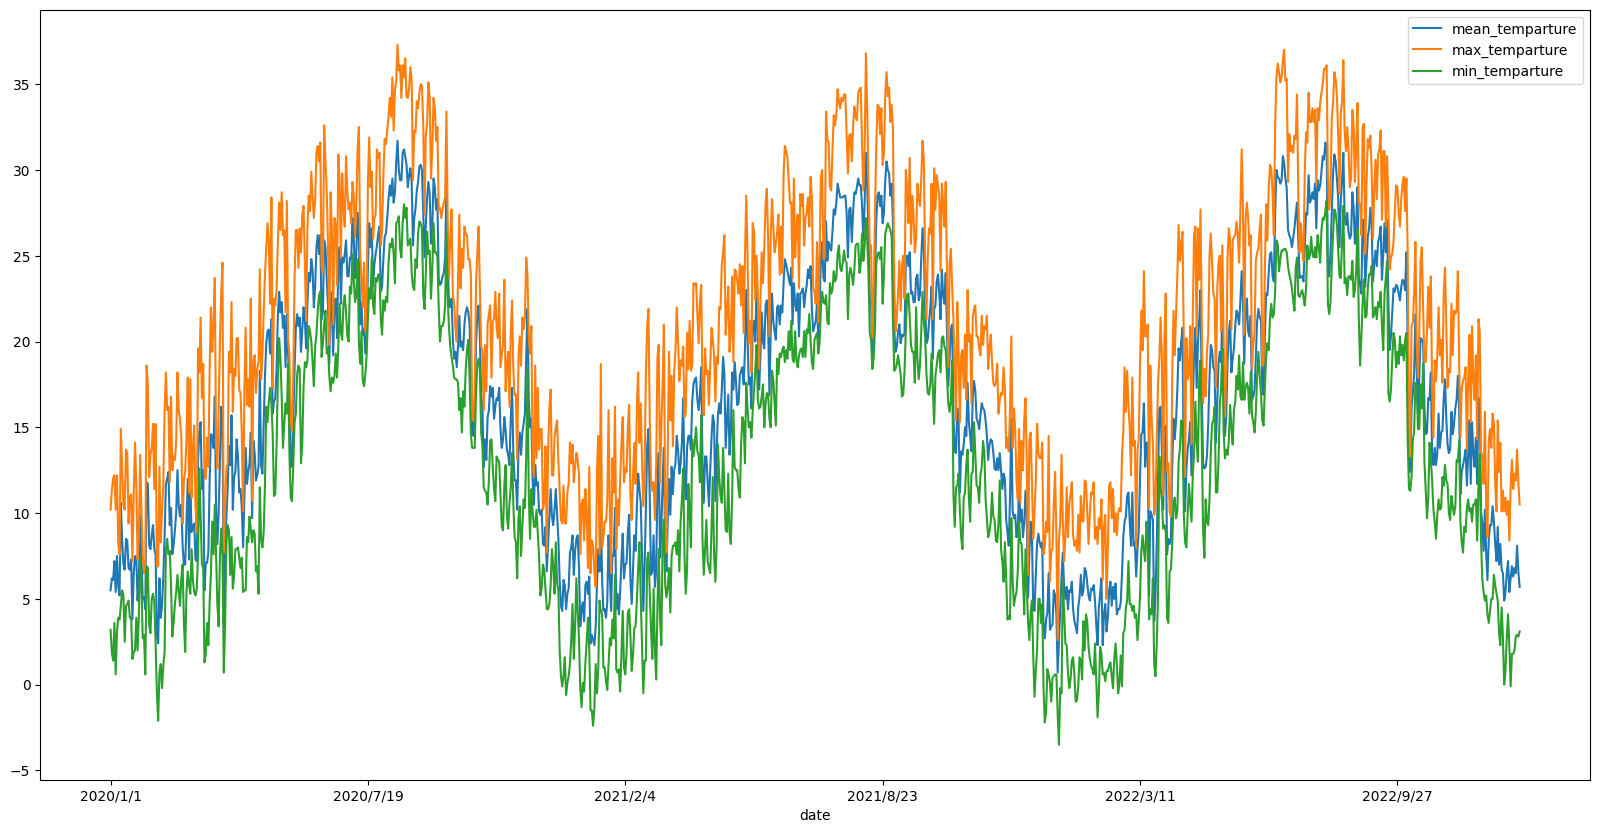

In [116]:
df_date = df.set_index("date")

df_date[["mean_temparture", "max_temparture", "min_temparture"]].plot(figsize=(20,10))

<Axes: xlabel='date'>

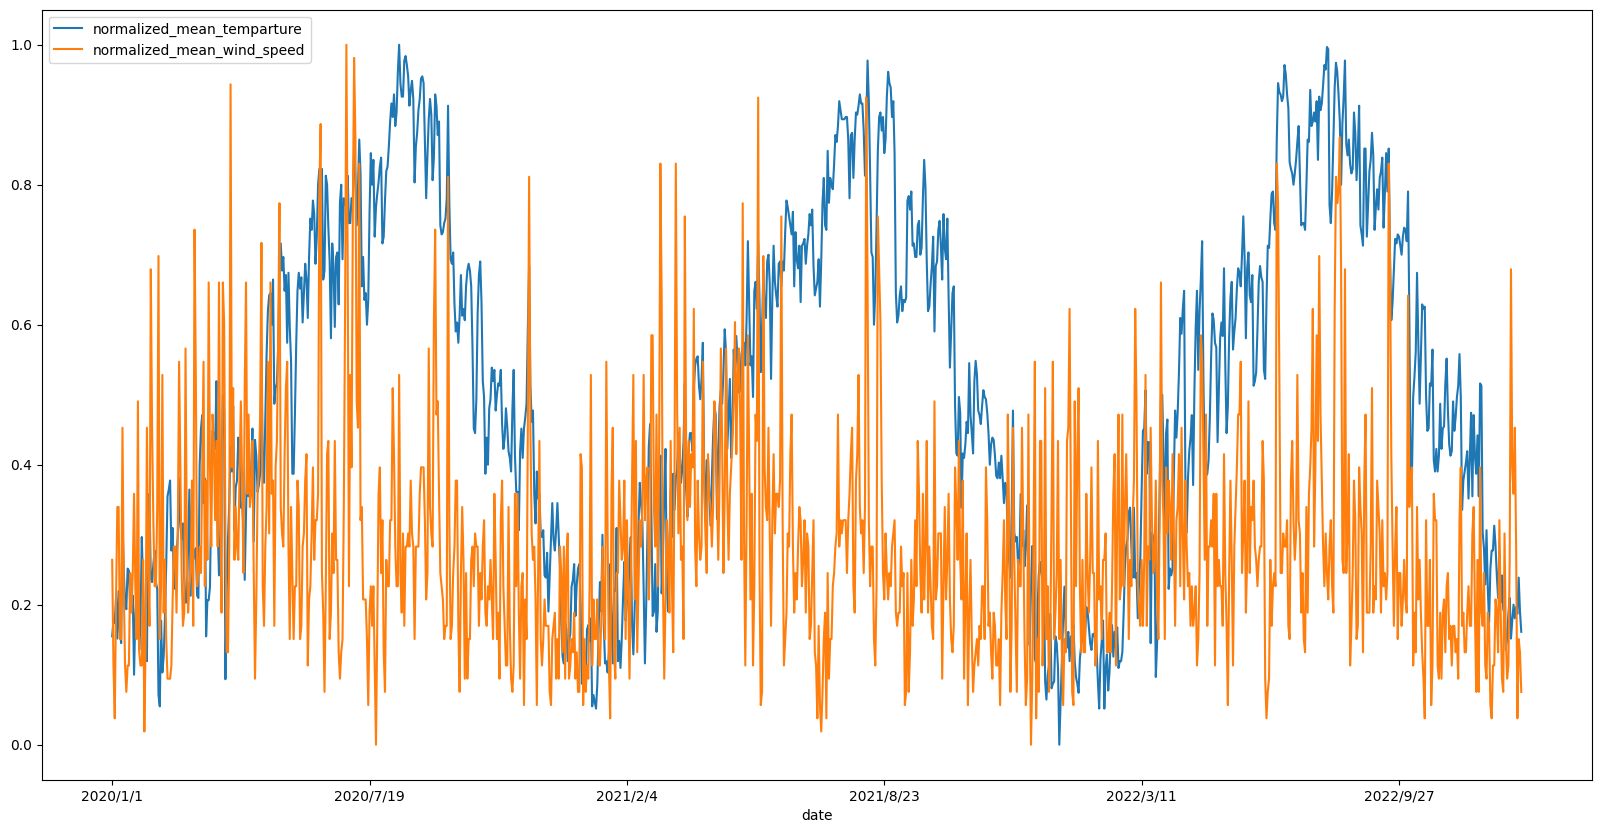

In [5]:
df_norm = df[["date", "mean_temparture", "mean_wind_speed"]]

df_norm = df_norm.set_index("date")

# 平均気温について正規化
df_norm["normalized_mean_temparture"] = \
                        (df_norm["mean_temparture"] - df_norm["mean_temparture"].min()) \
                        / (df_norm["mean_temparture"].max() - df_norm["mean_temparture"].min())

# 平均風速について正規化
df_norm["normalized_mean_wind_speed"] = \
                        (df_norm["mean_wind_speed"] - df_norm["mean_wind_speed"].min()) \
                        / (df_norm["mean_wind_speed"].max() - df_norm["mean_wind_speed"].min())

df_norm.drop(columns=["mean_temparture", "mean_wind_speed"]).plot(figsize=(20,10))

今回紹介したのはpandasの機能のごく一部に過ぎません。<br>
pandasには数多くの機能が備わっており多くの開発者が現在進行形で改良を行っています。<br>

[pandas API reference](https://pandas.pydata.org/docs/reference/index.html)

これらの機能を網羅的に覚えることにあまり意味はありません。<br>
自分の実現したいことに対して必要な機能がなんなのかを考え、それに応じて調査できる力を持つことが大切です。<br>

Pythonはユーザ数が1000万人を超えるともいわれる言語であり、他の言語と比較すると<br>
圧倒的に情報が入手しやすいことが強みの言語といえます。自分たちの業務の中でPythonが役立てられそうなものを<br>
見つけて似たようなことをやってる人がいないか検索してみるとよいかもしれません。<br>

[練習問題](../practice/lesson4.ipynb)